# Churn Prediction
**To develop a Machine learning model to predict the churn of the customer in a fictitious wireless telecom company and enhance them to stay remain in thier company**

# Data description
* Customer ID - Unique ID of each customer in the dataset.
* Gender - Male or female
* Senior Citizen - 0-No/ 1-Yes
* Partner - Having a partner or not (0 or 1)
* Dependents - Wheteher the customer has dependents or not (0 or 1)
* Tenure - Number of months that the customer stayed in the company.
* PhoneService - Whether the customer has phone service or not (0 or 1)
* Multiple Lines - Whether the customer has multiple lines or not (0,1 or No phone service)
* Internet Service - Internet service provider (DSL, Fiber optic,No)
* Online Security - Whether the customer has online security or not (0 or 1, No internet service)
* Online Backup - Whether the customer has backup or not(0 or 1, No internet service)
* Device protection - Whether the customer has device protection or not (0,1 or No internet Service)
* Tech Support - Whether the customer has tech support or not (0,1 or No internet Service)
* Streaming TV - Whether the customer has streaming TV or not (0,1 or No internet Service)
* Streaming Movies - Whether the customer has streaming Movie or not (0,1 or No internet Service)
* Contract - Contract term of the customer (Month-to-Month, one year , two year)
* Paperless billing - Whether the customer has paperless billing or not (0 or 1)
* Payment method - Customer's payment method (Electronic check, Mailed check, Bank transfer,credit card)
* Monthly charges - Monthly bill for the customer
* Total charges - Total amount charged for the customer
* Churn(Target) - Whether the customer stop using your company product or not (yes or no)

# Importing libraires

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.50,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [10]:
df.shape

(7043, 21)

In [11]:
#defining categorical and numerical features
categorical = df.select_dtypes(include=[np.object])
print("Number of categorical variables:",categorical.shape[1])

numerical = df.select_dtypes(include=[np.float64,np.int64])
print("Numeber of numerical variables:",numerical.shape[1])

Number of categorical variables: 17
Numeber of numerical variables: 4


In [12]:
#replacing null values
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [13]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# Univariate analysis

In [14]:
cid = df['customerID'].nunique()
print("Unique Customer ID:",cid)

Unique Customer ID: 7043


<AxesSubplot:xlabel='gender', ylabel='count'>

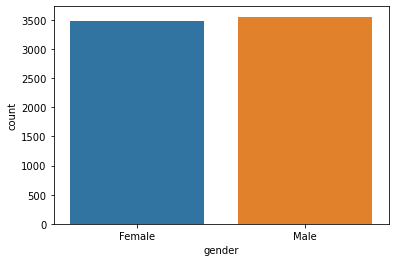

In [15]:
sns.countplot(df['gender'])

<AxesSubplot:xlabel='SeniorCitizen', ylabel='count'>

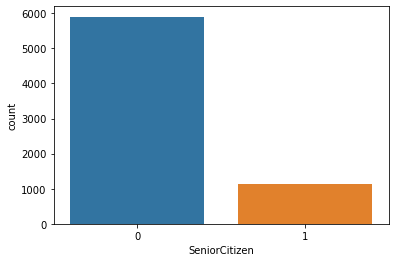

In [16]:
sns.countplot(df['SeniorCitizen'])

<AxesSubplot:ylabel='Partner'>

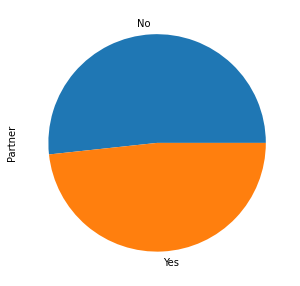

In [17]:
part = df['Partner'].value_counts()
part.plot(kind="pie",figsize=(8,5))

<AxesSubplot:xlabel='Dependents', ylabel='count'>

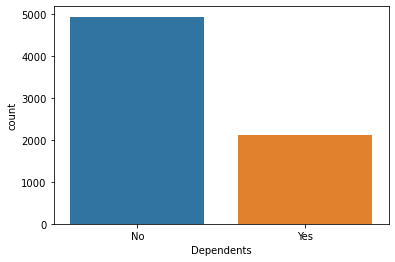

In [18]:
sns.countplot(df['Dependents'])

<AxesSubplot:xlabel='tenure'>

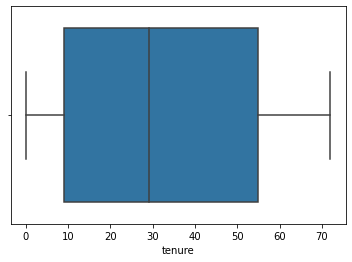

In [19]:
sns.boxplot(df['tenure'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

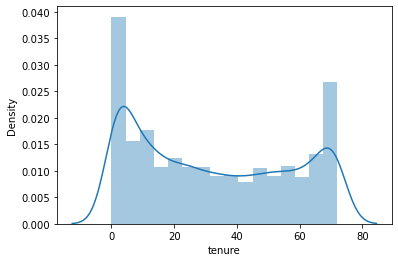

In [20]:
sns.distplot(df['tenure'])

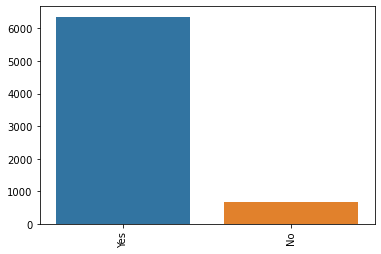

<Figure size 576x360 with 0 Axes>

In [21]:
ps = df['PhoneService'].value_counts()
sns.barplot(ps.index,ps.values)
plt.xticks(rotation=90)
plt.figure(figsize=(8,5))
plt.show()

<AxesSubplot:ylabel='MultipleLines'>

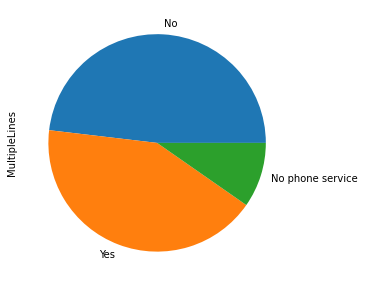

In [22]:
mul = df['MultipleLines'].value_counts()
mul.plot(kind="pie",figsize=(8,5))

<AxesSubplot:>

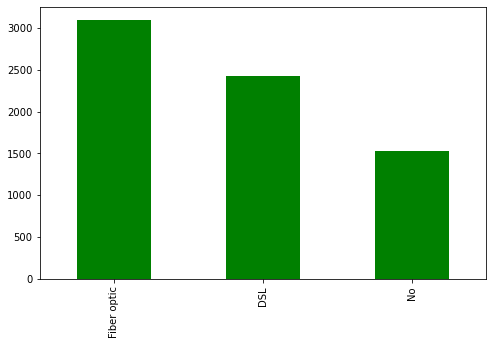

In [23]:
Is = df['InternetService'].value_counts()
Is.plot(kind="bar",figsize=(8,5),color = 'g')

<AxesSubplot:xlabel='OnlineSecurity', ylabel='count'>

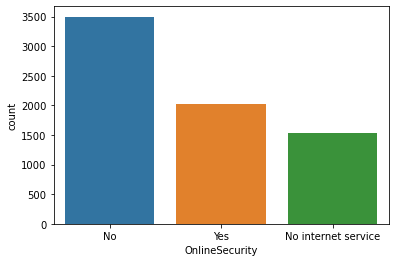

In [24]:
sns.countplot(df['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='count'>

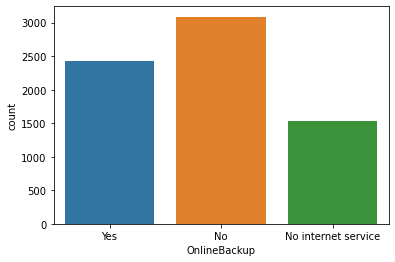

In [25]:
sns.countplot(df['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='count'>

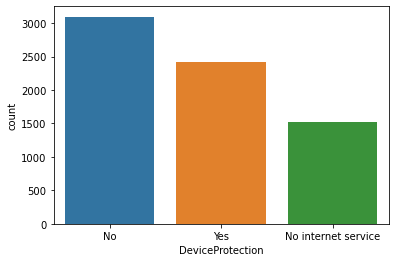

In [26]:
sns.countplot(df['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='count'>

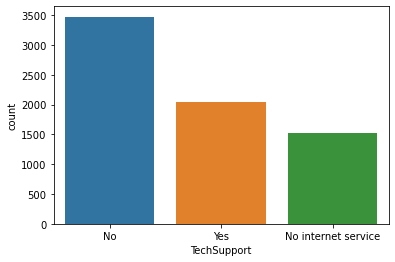

In [27]:
sns.countplot(df['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='count'>

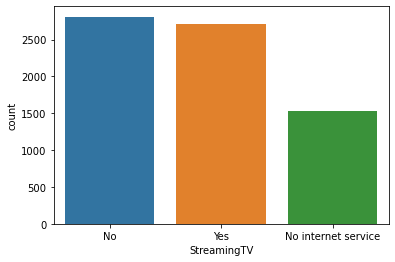

In [28]:
sns.countplot(df['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

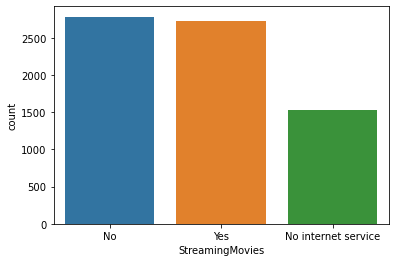

In [29]:
sns.countplot(df['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='count'>

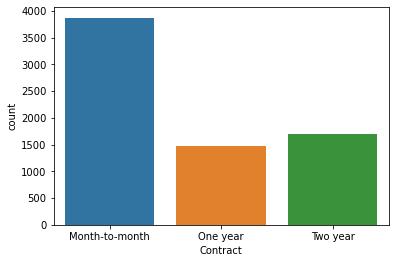

In [30]:
sns.countplot(df['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

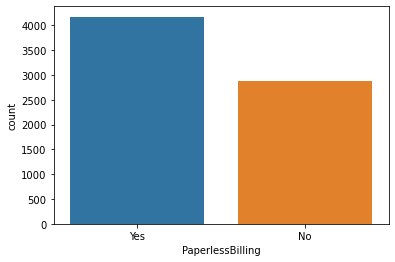

In [31]:
sns.countplot(df['PaperlessBilling'])

<AxesSubplot:ylabel='PaymentMethod'>

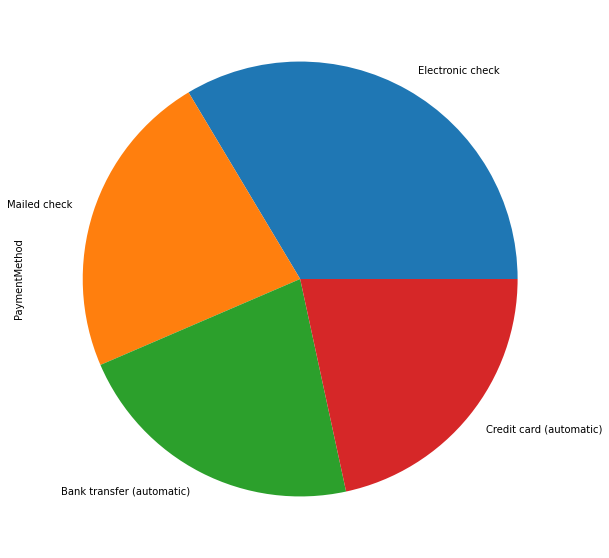

In [32]:
mul = df['PaymentMethod'].value_counts()
mul.plot(kind="pie",figsize=(20,10))

<AxesSubplot:xlabel='MonthlyCharges'>

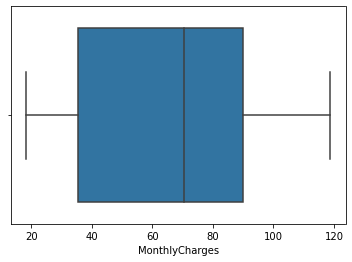

In [33]:
sns.boxplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

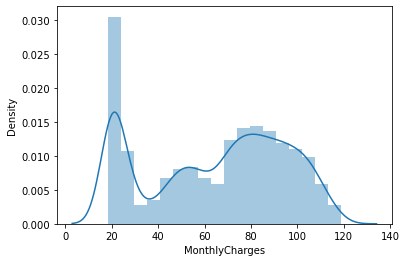

In [34]:
sns.distplot(df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges'>

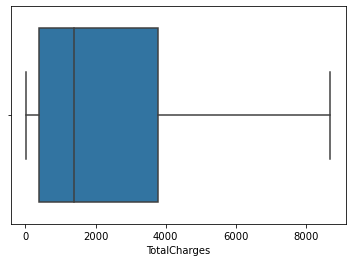

In [35]:
sns.boxplot(df['TotalCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

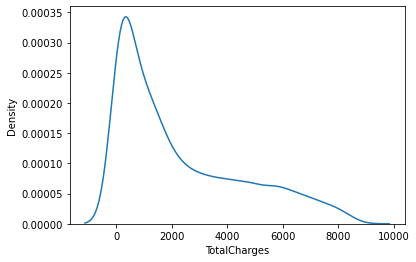

In [36]:
sns.distplot(df['TotalCharges'],hist=False)

# Overall observations from EDA:
**UNIVARIATE ANALYSIS:**
* The Churn dataset has 7043 rows and 21 columns.
* There are 17 categorical variables and 4 numerical variables.
* The Totalcharges column has some null values and treated by mean imputation.
* We have 7043 unique customers.
* Both male and female customers share equal position in the dataset.
* Very few senior citizen customer present in the datset.
* Many of the customer relationship remains single.
* Most of the customer have no dependents.
* The tenure period has no outliers and has a median of 30 months, it follows uniform distribution.
* Most of the customers are interested in phone service.
* Few of them have both phone services and internet connections.
* Many of the customers prefer Fiber optic to DSL.
* Few opted for online security.
* Most of them not interested in online backup of data.
* Most of the customers are not interested in opting techsupport and device protection.
* Tv and Movie streaming seems good among the customers.
* Month-to-month contract seems popular among the users.
* Every customer interested in doing online payment, Electronic check is popular.
* The monthly charges  have no outliers and has a median of 66 rupees. 
* The total charges have no outliers and has a median of 1800 rupees.

# Bivariate analysis

gender  SeniorCitizen
Female  0                2920
        1                 568
Male    0                2981
        1                 574
Name: SeniorCitizen, dtype: int64


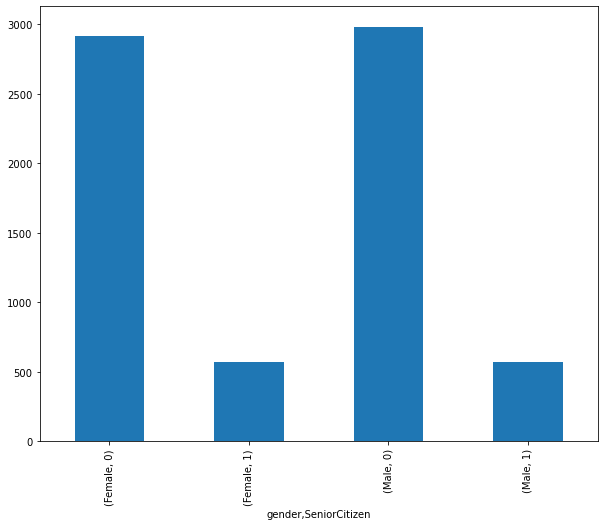

In [37]:
gp1 = df.groupby('gender')['SeniorCitizen'].value_counts()
gp1.plot(kind="bar",figsize=(10,8))
print(gp1)

gender  Partner
Female  No         1800
        Yes        1688
Male    No         1841
        Yes        1714
Name: Partner, dtype: int64


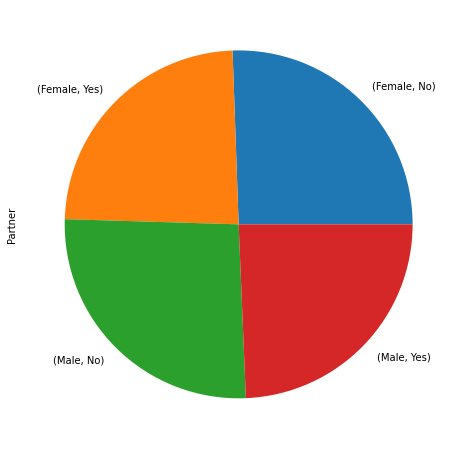

In [38]:
gp2 = df.groupby('gender')['Partner'].value_counts()
gp2.plot(kind="pie",figsize=(10,8))
print(gp2)

In [39]:
gp3 = df.groupby('gender')['Dependents'].value_counts()
gp3

gender  Dependents
Female  No            2460
        Yes           1028
Male    No            2473
        Yes           1082
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='tenure'>

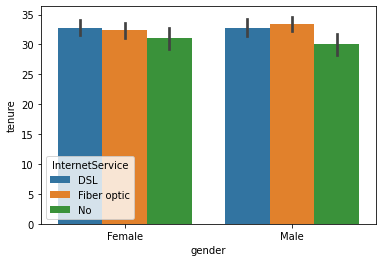

In [40]:
sns.barplot(x='gender',y='tenure',hue='InternetService',data=df)

gender  StreamingTV          InternetService
Female  No                   DSL                707
                             Fiber optic        679
        No internet service  No                 747
        Yes                  Fiber optic        874
                             DSL                481
Male    No                   DSL                757
                             Fiber optic        667
        No internet service  No                 779
        Yes                  Fiber optic        876
                             DSL                476
Name: InternetService, dtype: int64


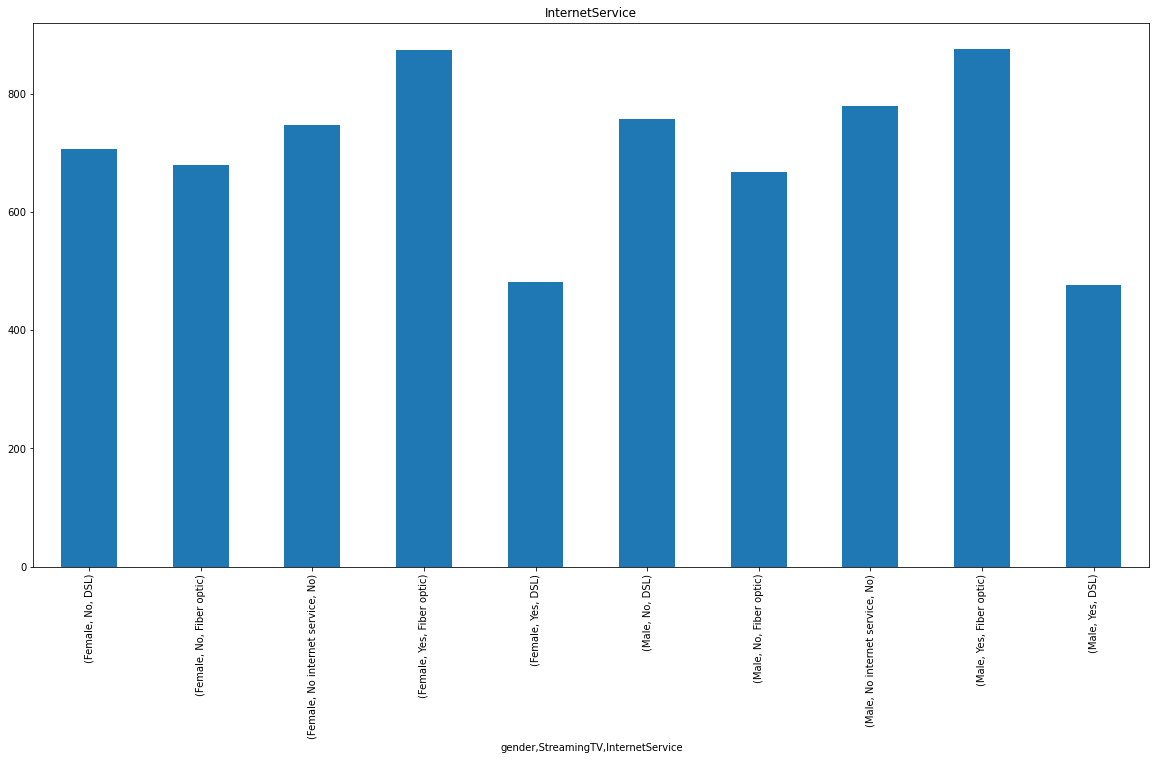

In [41]:
gp4 = df.groupby(['gender','StreamingTV'])['InternetService'].value_counts()
gp4.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp4)

gender  StreamingMovies      InternetService
Female  No                   DSL                688
                             Fiber optic        682
        No internet service  No                 747
        Yes                  Fiber optic        871
                             DSL                500
Male    No                   DSL                752
                             Fiber optic        663
        No internet service  No                 779
        Yes                  Fiber optic        880
                             DSL                481
Name: InternetService, dtype: int64


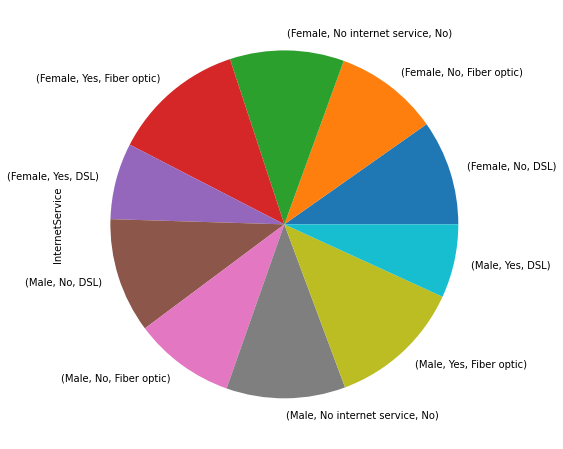

In [42]:
gp5 = df.groupby(['gender','StreamingMovies'])['InternetService'].value_counts()
gp5.plot(kind="pie",figsize=(10,8))
print(gp5)

gender  InternetService
Female  DSL                58.590741
        Fiber optic        91.472569
        No                 21.110710
Male    DSL                57.631427
        Fiber optic        91.527868
        No                 21.048973
Name: MonthlyCharges, dtype: float64


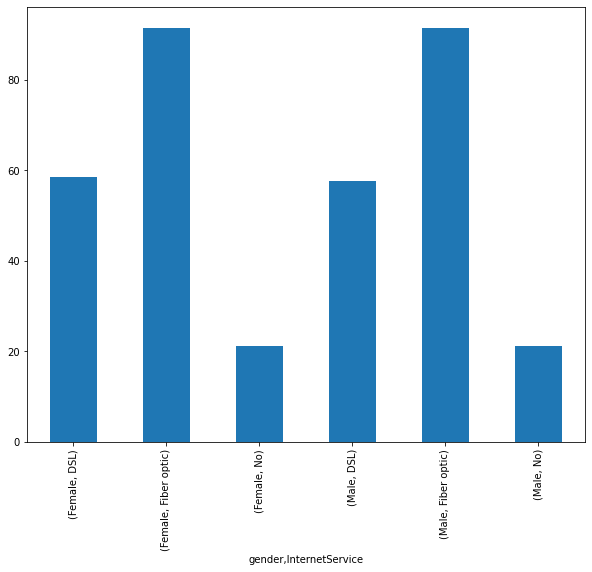

In [43]:
gp6 = df.groupby(['gender','InternetService'])['MonthlyCharges'].mean()
gp6.plot(kind='bar',figsize=(10,8))
print(gp6)

StreamingMovies      StreamingTV        
No                   No                     60.904113
                     Yes                    77.352803
No internet service  No internet service    21.079194
Yes                  No                     76.811742
                     Yes                    93.237500
Name: MonthlyCharges, dtype: float64


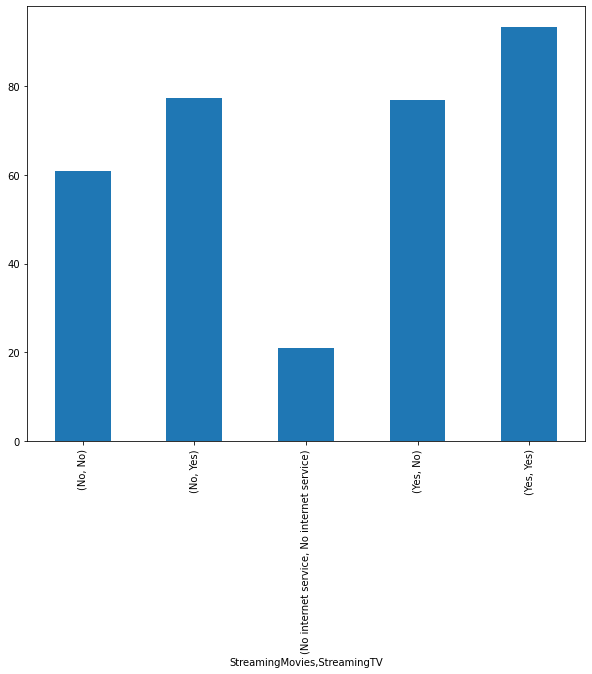

In [44]:
gp7 = df.groupby(['StreamingMovies','StreamingTV'])['MonthlyCharges'].mean()
gp7.plot(kind='bar',figsize=(10,8))
print(gp7)

OnlineSecurity       OnlineBackup       
No                   No                     71.722688
                     Yes                    82.381466
No internet service  No internet service    21.079194
Yes                  No                     72.467245
                     Yes                    83.891785
Name: MonthlyCharges, dtype: float64


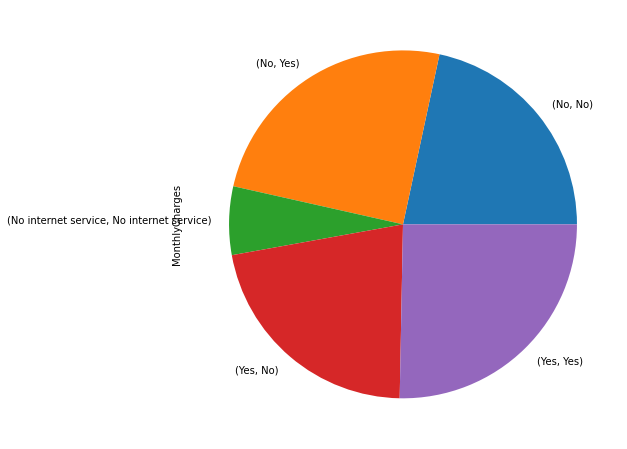

In [45]:
gp8 = df.groupby(['OnlineSecurity','OnlineBackup'])['MonthlyCharges'].mean()
gp8.plot(kind='pie',figsize=(10,8))
print(gp8)

DeviceProtection     TechSupport        
No                   No                     69.951858
                     Yes                    72.358144
No internet service  No internet service    21.079194
Yes                  No                     83.222053
                     Yes                    86.427750
Name: MonthlyCharges, dtype: float64


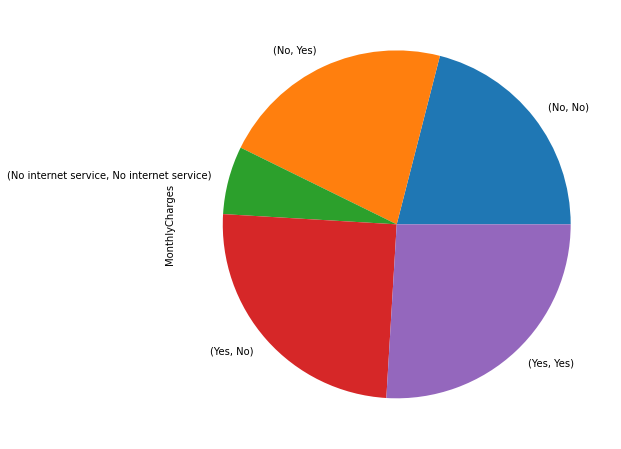

In [46]:
gp9 = df.groupby(['DeviceProtection','TechSupport'])['MonthlyCharges'].mean()
gp9.plot(kind='pie',figsize=(10,8))
print(gp9)

PhoneService  MultipleLines   
No            No phone service    42.028592
Yes           No                  54.195059
              Yes                 82.036974
Name: MonthlyCharges, dtype: float64


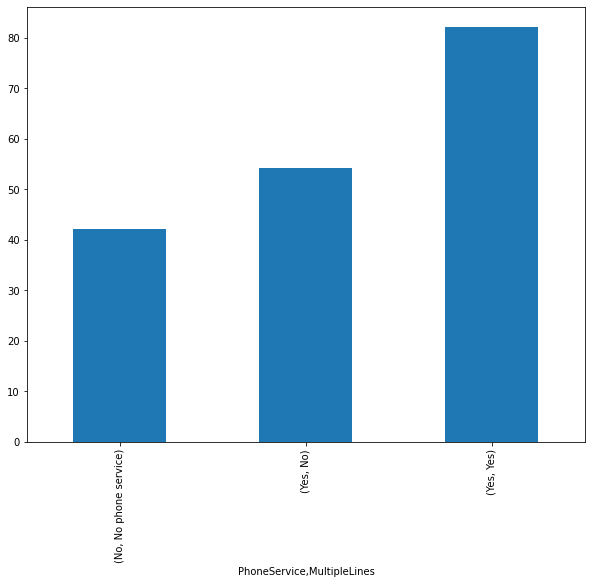

In [47]:
gp9 = df.groupby(['PhoneService','MultipleLines'])['MonthlyCharges'].mean()
gp9.plot(kind='bar',figsize=(10,8))
print(gp9)

gender  InternetService
Female  DSL                2138.111744
        Fiber optic        3166.033645
        No                  678.505623
Male    DSL                2102.798541
        Fiber optic        3244.830006
        No                  664.943520
Name: TotalCharges, dtype: float64


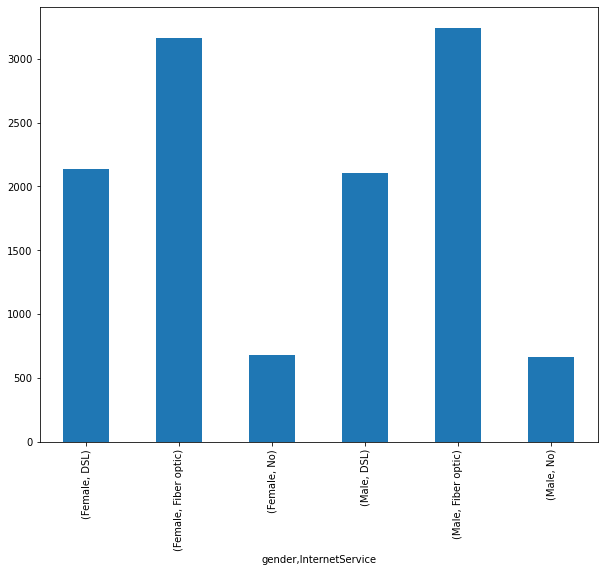

In [48]:
gp10 = df.groupby(['gender','InternetService'])['TotalCharges'].mean()
gp10.plot(kind='bar',figsize=(10,8))
print(gp10)

StreamingMovies      StreamingTV        
No                   No                     1417.657532
                     Yes                    2502.209519
No internet service  No internet service     671.582374
Yes                  No                     2545.720833
                     Yes                    4257.841134
Name: TotalCharges, dtype: float64


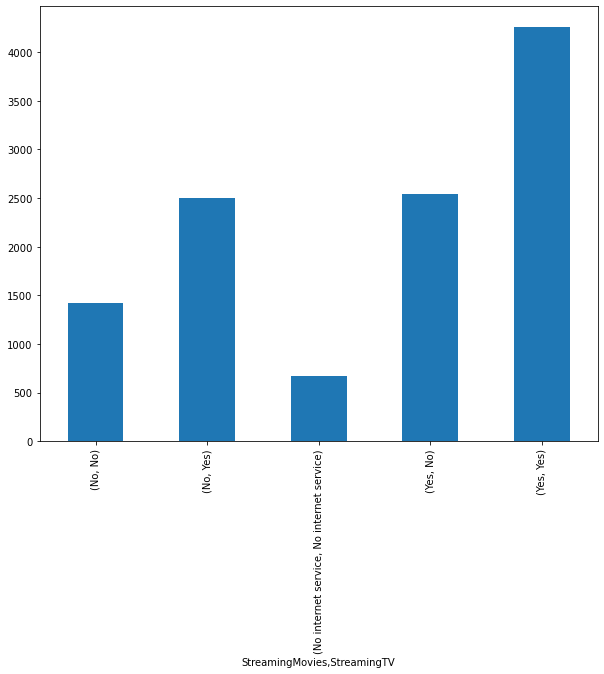

In [49]:
gp11 = df.groupby(['StreamingMovies','StreamingTV'])['TotalCharges'].mean()
gp11.plot(kind='bar',figsize=(10,8))
print(gp11)

OnlineSecurity       OnlineBackup       
No                   No                     1464.578269
                     Yes                    3267.918611
No internet service  No internet service     671.582374
Yes                  No                     2722.315790
                     Yes                    4575.999157
Name: TotalCharges, dtype: float64


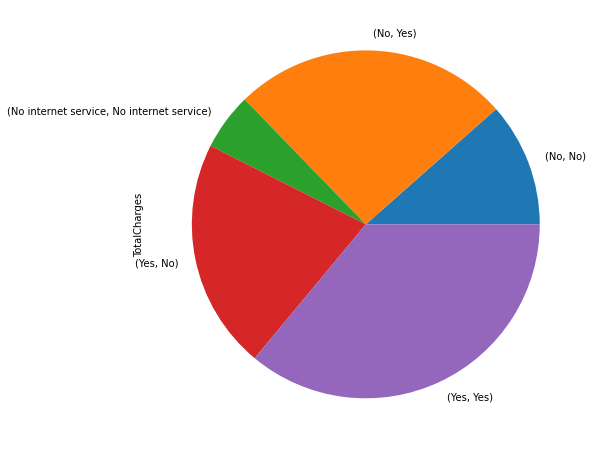

In [50]:
gp12 = df.groupby(['OnlineSecurity','OnlineBackup'])['TotalCharges'].mean()
gp12.plot(kind='pie',figsize=(10,8))
print(gp12)

DeviceProtection     TechSupport        
No                   No                     1478.641792
                     Yes                    2665.768563
No internet service  No internet service     671.582374
Yes                  No                     3228.886563
                     Yes                    4608.902979
Name: TotalCharges, dtype: float64


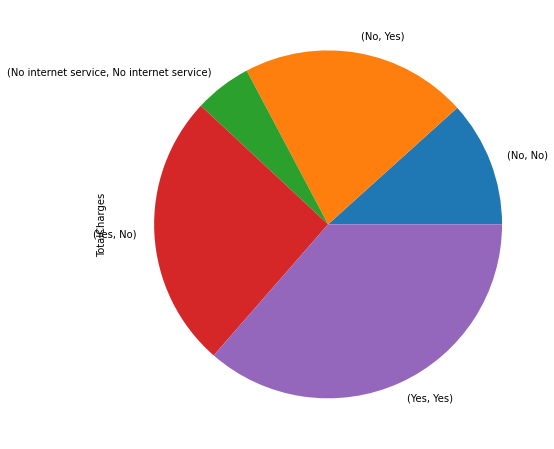

In [51]:
gp13 = df.groupby(['DeviceProtection','TechSupport'])['TotalCharges'].mean()
gp13.plot(kind='pie',figsize=(10,8))
print(gp13)

PhoneService  MultipleLines   
No            No phone service    1502.729547
Yes           No                  1351.209853
              Yes                 3526.025598
Name: TotalCharges, dtype: float64


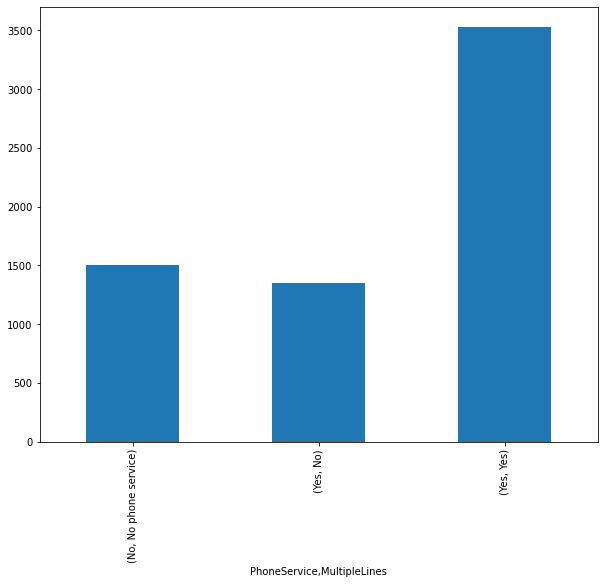

In [52]:
gp14 = df.groupby(['PhoneService','MultipleLines'])['TotalCharges'].mean()
gp14.plot(kind='bar',figsize=(10,8))
print(gp14)

PaperlessBilling  PaymentMethod            
No                Mailed check                  956
                  Bank transfer (automatic)     653
                  Credit card (automatic)       640
                  Electronic check              623
Yes               Electronic check             1742
                  Bank transfer (automatic)     891
                  Credit card (automatic)       882
                  Mailed check                  656
Name: PaymentMethod, dtype: int64


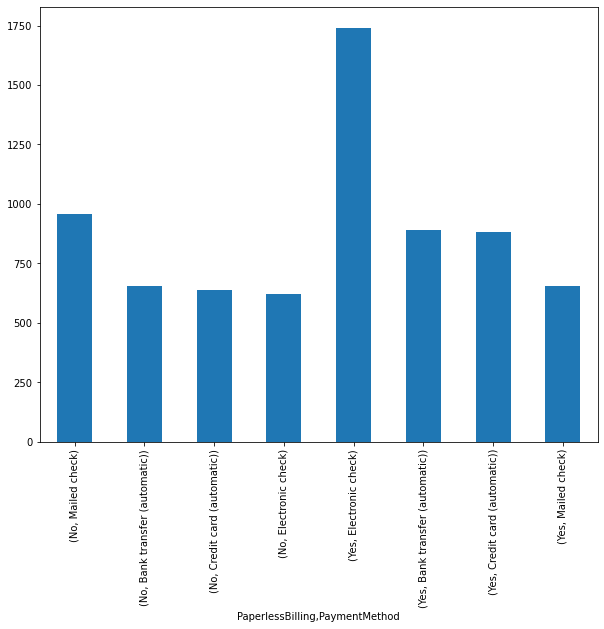

In [53]:
gp15 = df.groupby(['PaperlessBilling'])['PaymentMethod'].value_counts()
gp15.plot(kind='bar',figsize=(10,8))
print(gp15)

Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: Churn, dtype: int64


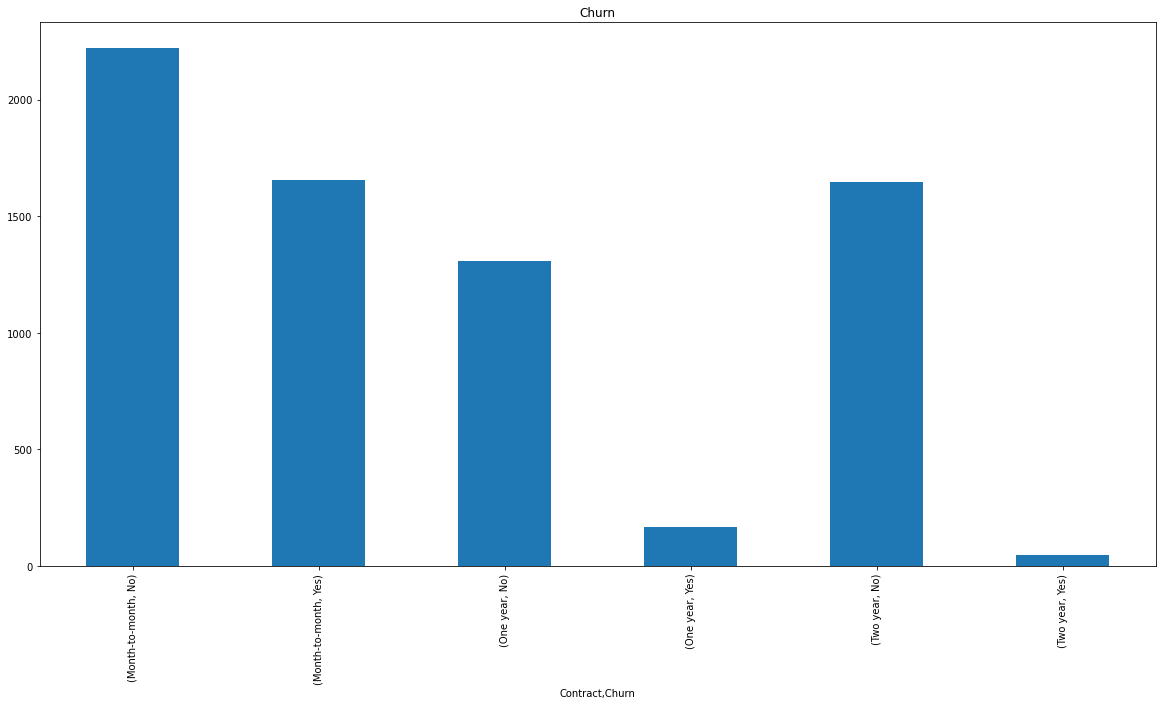

In [54]:
gp16 = df.groupby(['Contract'])['Churn'].value_counts()
gp16.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp16)

InternetService  Churn
DSL              No       1962
                 Yes       459
Fiber optic      No       1799
                 Yes      1297
No               No       1413
                 Yes       113
Name: Churn, dtype: int64


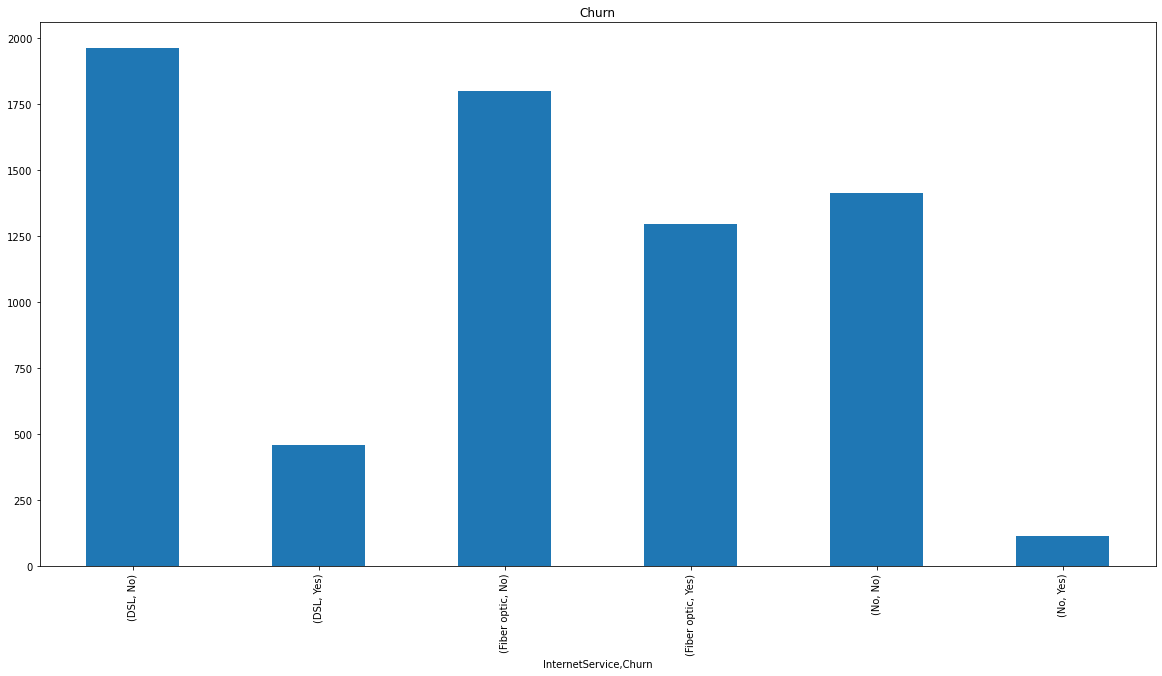

In [55]:
gp17 = df.groupby(['InternetService'])['Churn'].value_counts()
gp17.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp17)

                 MonthlyCharges  TotalCharges
InternetService                              
DSL                   58.102169   2120.126953
Fiber optic           91.500129   3205.304570
No                    21.079194    671.582374


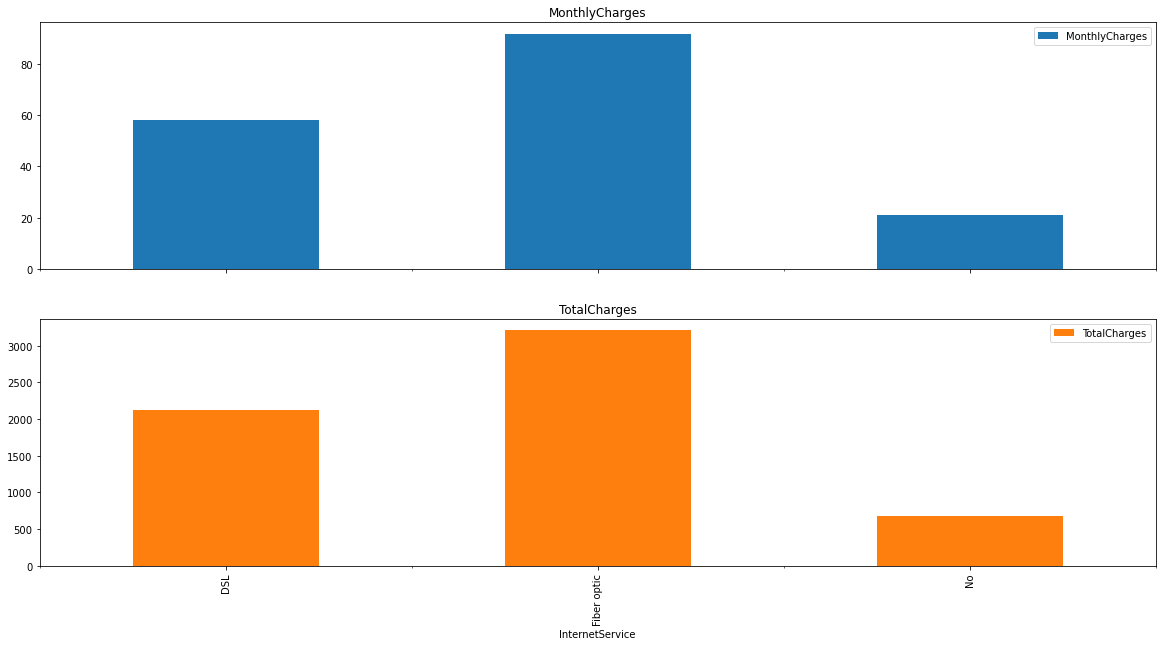

In [56]:
gp18 = df.groupby(['InternetService'])['MonthlyCharges','TotalCharges'].mean()
gp18.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp18)

       MonthlyCharges  TotalCharges
Churn                              
No          61.265124   2554.765772
Yes         74.441332   1531.796094


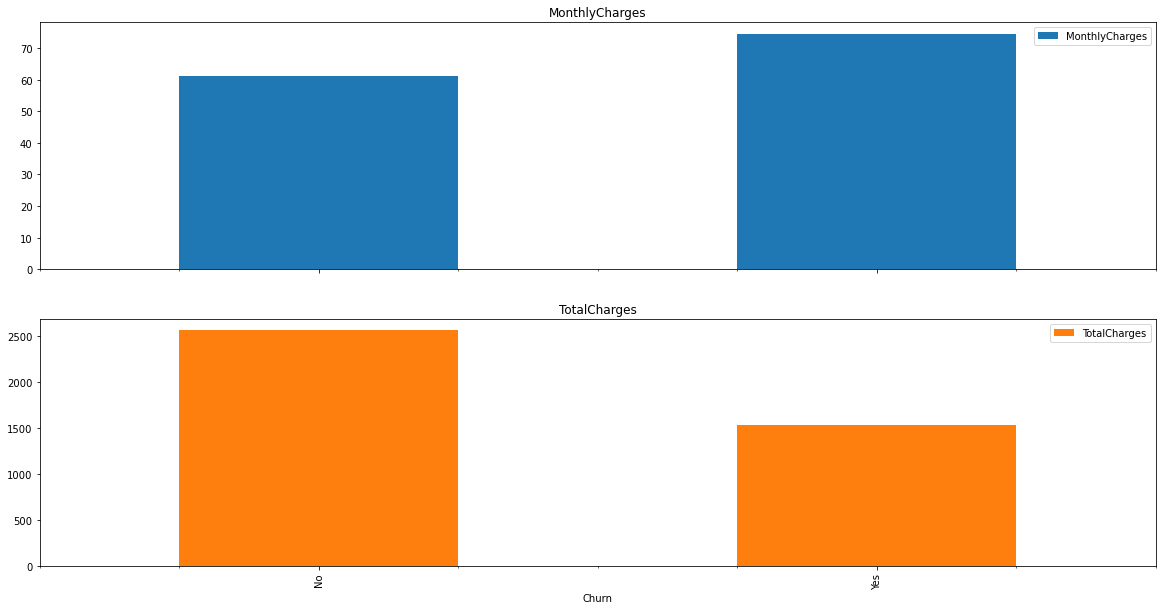

In [57]:
gp19 = df.groupby(['Churn'])['MonthlyCharges','TotalCharges'].mean()
gp19.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp19)

Contract
Month-to-month    66.398490
One year          65.048608
Two year          60.770413
Name: MonthlyCharges, dtype: float64


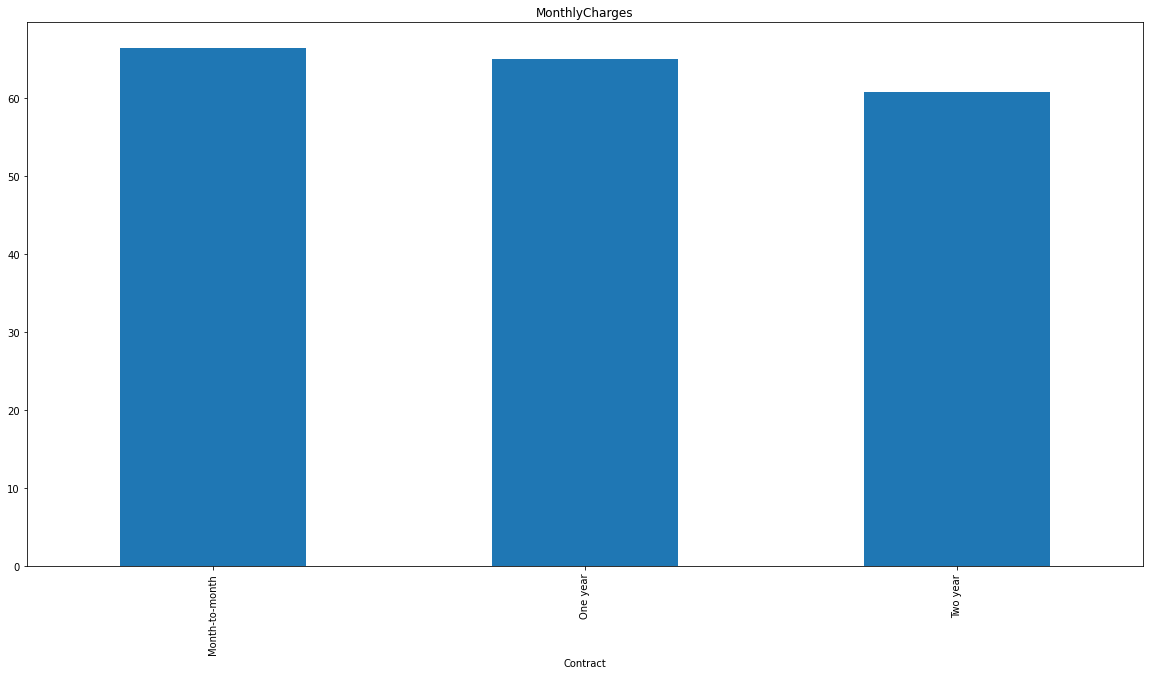

In [58]:
gp20 = df.groupby(['Contract'])['MonthlyCharges'].mean()
gp20.plot(kind="bar",figsize=(20,10),subplots=True)
print(gp20)

PhoneService  MultipleLines     Churn
No            No phone service  No        512
                                Yes       170
Yes           No                No       2541
                                Yes       849
              Yes               No       2121
                                Yes       850
Name: Churn, dtype: int64


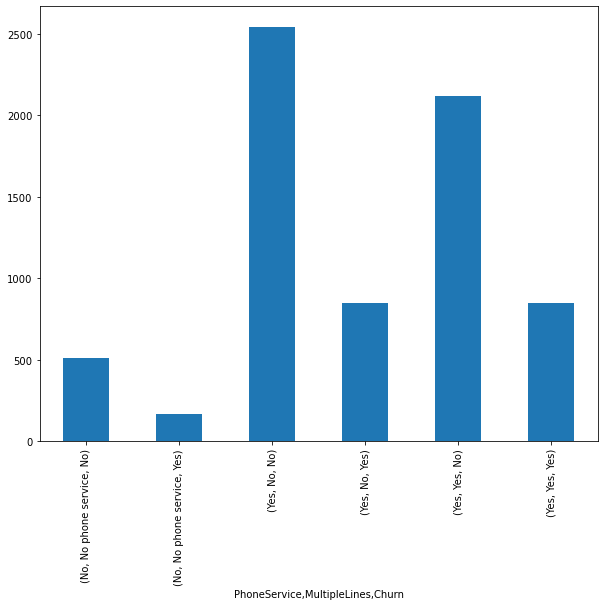

In [59]:
gp21 = df.groupby(['PhoneService','MultipleLines'])['Churn'].value_counts()
gp21.plot(kind='bar',figsize=(10,8))
print(gp21)

# Overall observations from EDA:

**BIVARIATE ANALYSIS:**
* Most of the customers are not a senior citizen.
* Male customers seems to be more independent than female customers.
* The bar graph gives a clear view of tenure period of individual internet services.
* Female customers who likes to stream tv and movies most likely to choose Fiber optic due to it's speed.
* Male customers who likes to stream tv and movies most likely to choose Fiber optic due to it's speed.
* Fiber optic internet sevice seems to be costly comparing to DSL networks.
* For streaming both TV and Movies this company charges around 93 rupees per month.
* For security purpose this company charges around 84 rupees per month.
* For tech support this compay charges and 86 rupees per month.
* For only Phone service the cost is nominal to 54 rupees.
* For streaming both TV and Movies this company charges around 4257 rupees per annum.
* For security purpose this company charges around 4575 rupees per annum.
* For tech support this compay charges and 4608 rupees per annum.
* For only Phone service the cost is nominal to 1351 rupees.
* Mailed check is popular among user those who are not interested in paperbilling.
* Electronic check is popular among user those who are interested in paperbilling.
* Churn of the customer increases incase they choose month-to-month contract.
* Due to highcost of Fiberoptic cable services, the company loses may of their valuable customers.
* Now by checking the overall charges for each services, fiberoptic charges 91 rupees per month which is not affordable by middle class people.
* DSL and no internet services are nominal at cost.
* Those are having high monthly charges, customers stop using company's valuable services.
* If you want a quality service at affordable cost, then choose a contract period of two years. It charges only 60 rupees per month.
* Those who are choosing both phone service and internet service opt to proceed with the company services.
* Pairplot is plotted to chech the multicollinearity of independent variables.

# Removing unwanted labels

In [60]:
df = df.drop('customerID',axis=1)

# Label encoding values

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
df['gender'] = le.fit_transform(df['gender'])
df['Partner'] = le.fit_transform(df['Partner'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['PhoneService'] = le.fit_transform(df['PhoneService'])
df['MultipleLines'] = le.fit_transform(df['MultipleLines'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['OnlineSecurity'] = le.fit_transform(df['OnlineSecurity'])
df['OnlineBackup'] = le.fit_transform(df['OnlineBackup'])
df['DeviceProtection'] = le.fit_transform(df['DeviceProtection'])
df['TechSupport'] = le.fit_transform(df['TechSupport'])
df['StreamingTV'] = le.fit_transform(df['StreamingTV'])
df['StreamingMovies'] = le.fit_transform(df['StreamingMovies'])
df['Contract'] = le.fit_transform(df['Contract'])
df['PaperlessBilling'] = le.fit_transform(df['PaperlessBilling'])
df['PaymentMethod'] = le.fit_transform(df['PaymentMethod'])
df['Churn'] = le.fit_transform(df['Churn'])

In [63]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [64]:
df.shape

(7043, 20)

<AxesSubplot:>

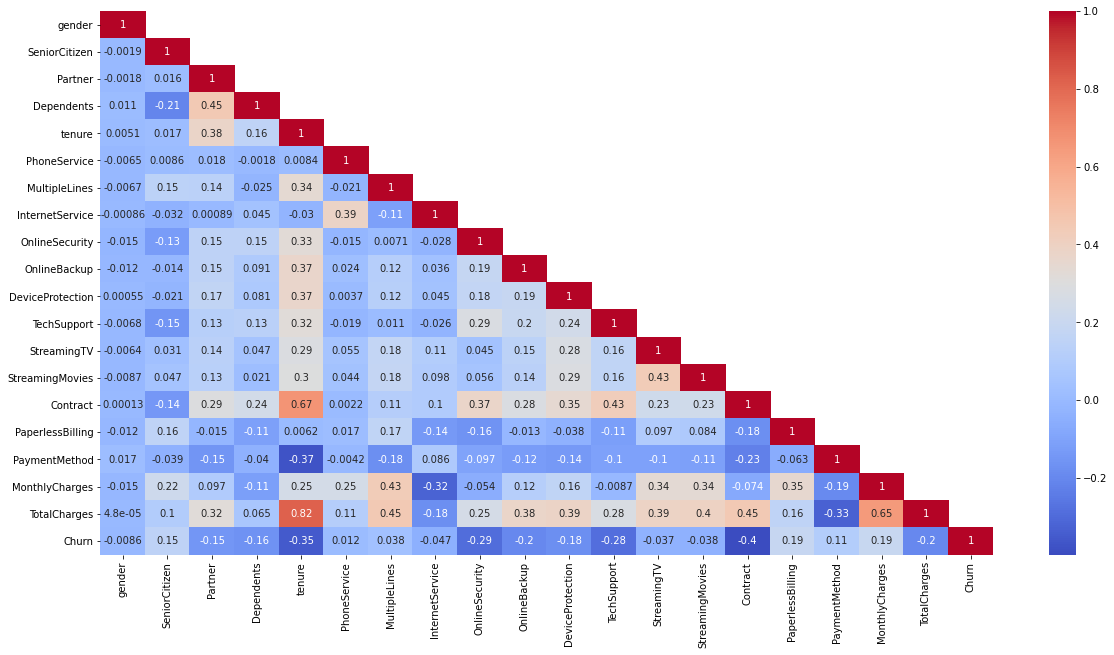

In [65]:
plt.figure(figsize=(20,10))
df_lt = df.corr(method = "pearson")
df_lt1 = df_lt.where(np.tril(np.ones(df_lt.shape)).astype(np.bool))
sns.heatmap(df_lt1,annot=True,cmap="coolwarm")

# Train test split of the data

In [66]:
target = df['Churn']
data = df.drop("Churn",axis=1)

In [67]:
target.shape

(7043,)

In [68]:
data.shape

(7043, 19)

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data,target,test_size=0.20,random_state=101)

# Predictive Churn model - description

* After Exploratory data analysis, We move on to the important part of building model.
* The data has been preprocessed using sklearn library.
* We don't want ***Customer ID*** as it has 7043 unique values, we drop that feature.
* Next we have encoded all the categorical variables in the dataset.
* The data is now set to train_test_split.
* Here 80% of data in training set and 20% of data in testing set.
* The model that we are going to build has 19 independent feature and 1 dependent feature[CHURN]

# Model building
# Logistic regression

In [70]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [71]:
x_pred = lr.predict(X_train)
y_pred = lr.predict(X_test)

In [72]:
from sklearn.metrics import plot_confusion_matrix,accuracy_score
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.8033368832090877
Testing accuracy: 0.7977288857345636


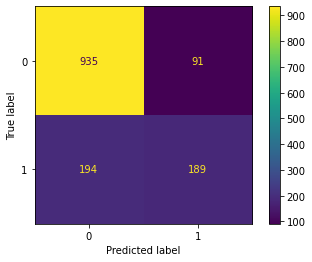

In [73]:
plot_confusion_matrix(lr,X_test,y_test,values_format='d')

# Random forest classifer

In [74]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [75]:
x_pred = rf.predict(X_train)
y_pred = rf.predict(X_test)

In [76]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.9982250621228257
Testing accuracy: 0.7721788502484032


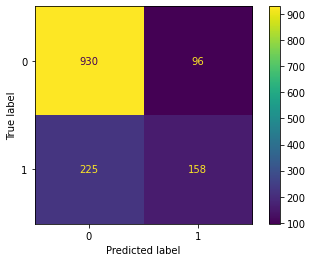

In [77]:
plot_confusion_matrix(rf,X_test,y_test,values_format='d')

# Support vector machines

In [78]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)

SVC()

In [79]:
x_pred = sv.predict(X_train)
y_pred = sv.predict(X_test)

In [80]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.7362442314518992
Testing accuracy: 0.7281760113555713


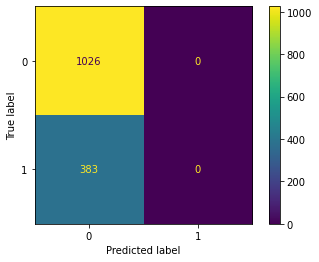

In [81]:
plot_confusion_matrix(sv,X_test,y_test,values_format='d')

# Naive Bayes

In [82]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [83]:
x_pred = nb.predict(X_train)
y_pred = nb.predict(X_test)

In [84]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.7559460418885339
Testing accuracy: 0.7487579843860894


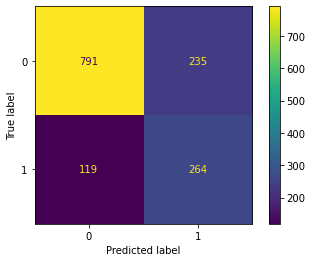

In [85]:
plot_confusion_matrix(nb,X_test,y_test,values_format='d')

# KNN Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [87]:
x_pred = knn.predict(X_train)
y_pred = knn.predict(X_test)

In [88]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.8104366347177849
Testing accuracy: 0.7636621717530163


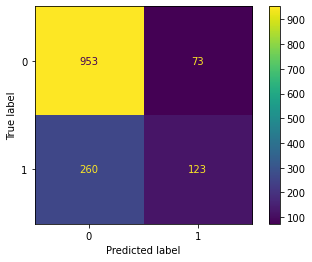

In [89]:
plot_confusion_matrix(knn,X_test,y_test,values_format='d')

# Decision tree classifier

In [90]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [91]:
x_pred = dt.predict(X_train)
y_pred = dt.predict(X_test)

In [92]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.9982250621228257
Testing accuracy: 0.7203690560681334


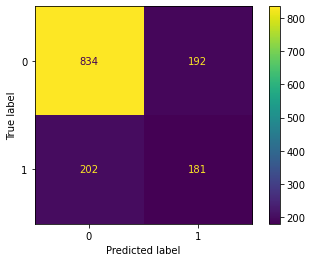

In [93]:
plot_confusion_matrix(dt,X_test,y_test,values_format='d')

# Neural networks

In [94]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier()
nn.fit(X_train,y_train)

MLPClassifier()

In [95]:
x_pred = nn.predict(X_train)
y_pred = nn.predict(X_test)

In [96]:
print("Training accuracy:",accuracy_score(y_train,x_pred))
print("Testing accuracy:",accuracy_score(y_test,y_pred))

Training accuracy: 0.7642882499112531
Testing accuracy: 0.7665010645848119


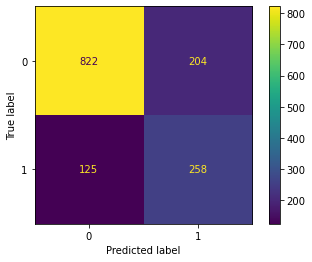

In [97]:
plot_confusion_matrix(nn,X_test,y_test,values_format='d')

# Selection of variables
* The correlation heat map gives an clear cut view of how the variables correlated with each other.
* Most of the value correlated with ***Churn*** have negative relationship.
* We cannot drop all the values, So we are proceeding with all the remaining feature present in the dataset.
* All the features play a nominal role in predicting the churn, So we cannot drop all the features.

# Performance of ML model
**Logistic regression**
* This model performs very well in both training as well as testing data.
* It gives an accuracy of 80% in training set and 79% in testing set.
* It is the best fit model.

**Random Forest Classifier**
* This model performs very well in training set but moderately in testing set.
* This algorithm makes the model to be overfitted in the dataset.
* It gives an accuarcy of 99% in training set and only 77% in testing set.
* This model overfits so we will not be proceeding with this model.

**Support vector Machines**
* It is one of the famous ML Classification algorithm.
* It gives an overall accuracy of 73% in training set and 72%in testing set.

**Naive Bayes**
* It is one of the simplest classification algorithm.
* It gives an accuracy of 75% in train set and 74% in testing set.
* It is a well performed model.

**Decision tree classifier**
* This model performs very well in training set but moderately in testing set.
* This algorithm makes the model to be overfitted in the dataset.
* It gives an accuarcy of 99% in training set and only 73% in testing set.
* This model overfits so we will not be proceeding with this model.

**KNN Classifier**
* It is also one of the best and efficient  Classification algorithm.
* It gives an accuracy of 81% in training set which is the best and 77% in test set.
* We can also proceed with this model.

**Neural Networks**
* MLPClassifier is a deep learning algorithm for Machine learning which uses neural network for prediction.
* It gives an accuracy of 80% in train set and 78% in test set.
* One of the well-fitted and best model.

# Tools used for measuring performance
* One of the best tool in measuring performance in machine learning model is accuracy.
* ***Sklearn*** library makes it very simple for us to calculate it.
* The plot confusion matrix helps us to categorize the number of correctly classified data and wrongly classified data. 
$$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$$
* Precision gives the number of predicted postive values.
* Recall gives the number of actual values that are predicted correctly.

In [98]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1026
           1       0.56      0.67      0.61       383

    accuracy                           0.77      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.78      0.77      0.77      1409



In [99]:
from sklearn.metrics import roc_curve
pred_prob1 = lr.predict_proba(X_test)
pred_prob2 = rf.predict_proba(X_test)
pred_prob3 = nb.predict_proba(X_test)
pred_prob4 = knn.predict_proba(X_test)
pred_prob5 = dt.predict_proba(X_test)
pred_prob6 = nn.predict_proba(X_test)
fpr1,tpr1,thresh1 = roc_curve(y_test,pred_prob1[:,1],pos_label=1)
fpr2,tpr2,thresh2 = roc_curve(y_test,pred_prob2[:,1],pos_label=1)
fpr3,tpr3,thresh3 = roc_curve(y_test,pred_prob3[:,1],pos_label=1)
fpr4,tpr4,thresh4 = roc_curve(y_test,pred_prob4[:,1],pos_label=1)
fpr5,tpr5,thresh5 = roc_curve(y_test,pred_prob5[:,1],pos_label=1)
fpr6,tpr6,thresh6 = roc_curve(y_test,pred_prob6[:,1],pos_label=1)

In [100]:
random_prob = [0 for i in range(len(y_test))]
p_fpr , p_tpr , _ = roc_curve(y_test,random_prob, pos_label=1)

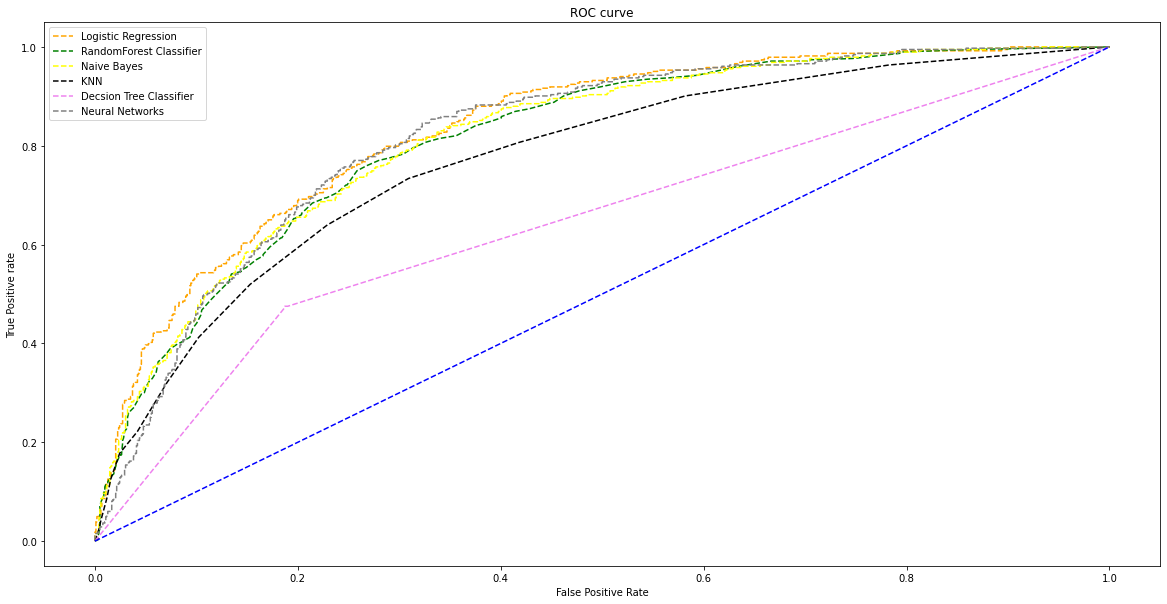

In [101]:
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForest Classifier')
plt.plot(fpr3, tpr3, linestyle='--',color='yellow', label='Naive Bayes')
plt.plot(fpr4, tpr4, linestyle='--',color='black', label='KNN')
plt.plot(fpr5, tpr5, linestyle='--',color='violet', label='Decsion Tree Classifier')
plt.plot(fpr6, tpr6, linestyle='--',color='grey', label='Neural Networks')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')

# From ROC Curve:
* From the ROC curve, we can clearly note that Logistic Regression model is the best model that seperates true postive rate form false positive rate.
* We will be building model using the Logistic Regression method.

# Keyfactors and thier importance:
* The keyfactor is the ***Internet service, Contract and Monthly Charges.***
* Those who have no internet services are very well satisfied with the phone services.
* Those who have internet service prefer fiber optic to dsl networks.
* The monthly charge for fiber optic seems very costly comparing to other services of the company.
* The contract period is very nominal if one choose two year or one year contract.
* Most of the customer stop using the company's service due to month to month charge is high.
* Even no internet customers are paying high in a month due to convinience charge.

# Offers that makes company more reputed:
* The company sholud focus more on internet users.
* Offer such as free streaming of movies and TV for a few month of purchase of the network and tech support is appreciated.
* Can reduce bill amount on monthly charges for fiber optic users.
* Assuring unbelievable offers to use internet service for those who have only mobile network can also reduce the churn for the company.
* Providing cash back offers for monthly contract users.
* By making discount on device protection, online security, online backup, tech support to attract more customer to choose the company product.
* Our target customer should be an independent person and not a senior citizen.
* Youngsters tends more to use internet service. Attractive discount may lead to reduction of churn.
* Create an app to pay charges online to avoid contactless transaction.
* Providing additional discount on those who are paying via online.

# Conclusion:
* A Telecom company dataset is provided to predict the churn of the customer.
* Exploratory data analysis gives an more perfect view of the data.
* Logistic regression perfoms very well comparing to other Machine learning algorithms.
* By giving the offeres mentioned above will make sure that it will reduce the churn of the company.
* Creating an app to monitor customer preference is value added for the company.

$$ *** \ THANK \ YOU *** $$